# Notebook d'aide/correction pour la séance EPU MAM4 Biomaths (suite 4)

*séance du 21/03/2022*

*Ludovic Mailleret, Mars 2022*

## Populations en interaction : le modèle proies-prédateurs de Rosenzweig et MacArthur

### Dynamiques et plan de phase

Nous considérons le modèle de dynamique de populations attribué à Rosenzweig et MacArthur (voir [Rosenzweig & MacArthur (1963)](http://www.jstor.com/stable/2458702), [Turchin (2003)](http://www.jstor.com/stable/2458702), [Smith (2008)](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.710.95&rep=rep1&type=pdf)).

$$
\left\{\begin{array}{l}
\dot x = \displaystyle rx\left(1-\frac{x}{K}\right) - c \frac{x}{h+x} y\\
\dot y = b\displaystyle \frac{x}{h+x} y - m y
\end{array}\right.
$$

Il n'y a pas de difficulté particulière à la simulation par rapport au modèle de Lotka Volterra.

In [1]:
# on nettoie l'espace de travail et on reload les modules
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# script de simulation 
# densités initiales des populations
x0 = 1
y0 = 2.5

# encapsulation de la densité initiale
etat0_RMA = np.array([x0, y0])

# définition d'un vecteur tspan pour tracer E_varie()
t_0 = 0             # temps initial
t_fin = 80.0        # temps final, ici on prend un temps final long pour observer les dynamiques lentes
pas_t = 0.01        # pas de temps de récupération des variables entre t_0 et t_fin

# définition du tspan 
tspan = np.arange(t_0, t_fin, pas_t)

# paramètres du modèle (il y a un cycle limite attractif pour ces valeurs)
r = 1.0
K = 10
c = 1.0
h = 2.0
b = 2.0
m = 1.0

# encapsulation des paramètres dans un array
params_RMA = np.array([r, K, c, h, b, m])


# définition du modèle de Lotka Volterra
def modele_RMA(etat, t, params):
    x, y = etat                               # recupere les variables d'etat
    r, K, c, h, b, m = params               # recupere les parametres 
    etatdot = [r*x*(1-x/K) - c*x/(h+x)*y,     # dot x
               b*x/(h+x)*y - m*y]       # dot y
    return etatdot                                      # renvoie la derivee


# simulation proprement dite
int_RMA = odeint(modele_RMA, etat0_RMA, tspan, args=(params_RMA,), hmax=pas_t)

Représentation graphique:

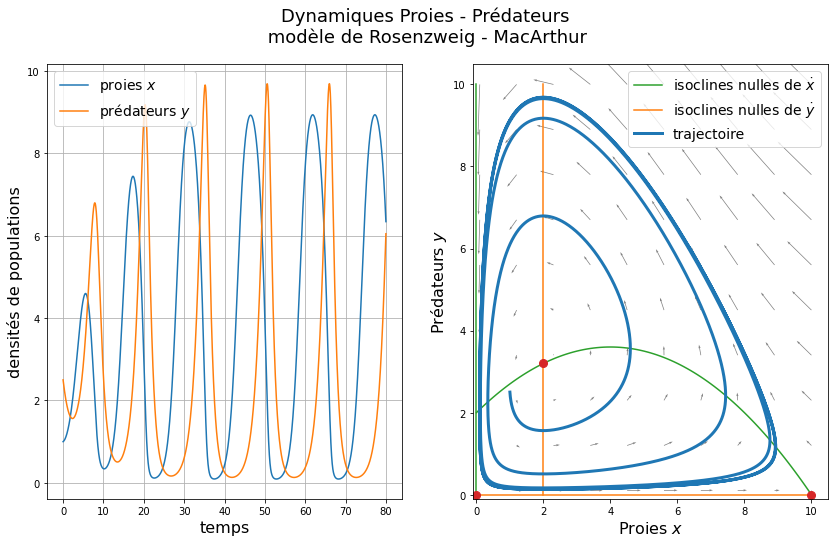

In [2]:
# création d'une figure, et d'un système d'axe
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))  

# titre de la figure
fig1.suptitle("Dynamiques Proies - Prédateurs\n modèle de Rosenzweig - MacArthur", va='top', fontsize='18')

###
# tracé de x et y contre le temps
ax1.plot(tspan, int_RMA[:, 0], color = 'C0', label = "proies $x$")
ax1.plot(tspan, int_RMA[:, 1], color = 'C1', label = "prédateurs $y$")

# labellisation des axes
ax1.set_xlabel('temps', fontsize='16')
ax1.set_ylabel('densités de populations', fontsize='16')

# légende
ax1.legend(fontsize='14')

# modification éventuelle des bornes des axes
ax1.set_ylim(bottom=None, top=None)

# ajout d'une grille
ax1.grid()


###
# plan de phase

# calcul des isoclines nulles
# array pour plot
xplot = np.arange(0, K+.1, .1)  
yplot = np.arange(0, K+.1, .1)

# isoclines nulles de xdot
null_x_x = np.zeros_like(yplot)        # x = 0 isocline nulle de xdot
null_x_y = r/c*(h+xplot)*(1-xplot/K)    # y = f(x) isocline nulle de xdot

#isoclines nulles de ydot
null_y_y = np.zeros_like(xplot)        # y = 0 isocline nulle de ydot
null_y_x = np.ones_like(yplot)*m*h/(b-m)                   # x = mh/(b-m) isocline nulle de ydot

# équilibres
eq_extinct = [0, 0]
eq_coex = [m*h/(b-m), r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K)]
eq_prey = [K, 0]

# tracé des isoclines nulles, des équilibres, et de la trajectoire simulée
# isoclines nulles de x
ax2.plot(null_x_x, yplot, color = 'C2')
ax2.plot(xplot, null_x_y, color = 'C2', label = "isoclines nulles de $\dot x$")
# isoclines nulles de y
ax2.plot(xplot, null_y_y, color = 'C1')
ax2.plot(null_y_x, yplot, color = 'C1', label = "isoclines nulles de $\dot y$")

# équilibres
ax2.plot(eq_extinct[0], eq_extinct[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_coex[0], eq_coex[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_prey[0], eq_prey[1], marker ='.', color = 'C3', markersize = 16)


# trajectoires
ax2.plot(int_RMA[:, 0], int_RMA[:, 1], color = 'C0', linewidth = 3, label = "trajectoire")

# labellisation des axes
ax2.set_xlabel('Proies $x$', fontsize='16')
ax2.set_ylabel('Prédateurs $y$', fontsize='16')

# légende
ax2.legend(fontsize='14', loc = "upper right")

# modification éventuelle des bornes des axes
ax2.set_ylim(bottom=-.1, top=None)
ax2.set_xlim(left=-.1, right=None)

# représentation du champs de vecteurs
# définition de l'échantillonnage selon $x$ et $y$
x_grid = np.linspace(0.1, K, 10)   # au passage on change un peu de np.arange()
y_grid = np.linspace(0.1, K, 10)

# grille X,Y selon x_grid et y_grid
X, Y = np.meshgrid(x_grid, y_grid)

# dérivées dot_x et dot_y sur la grille
dx, dy = modele_RMA([X, Y], 0, params_RMA)

# tracé du champs de vecteurs
# Attention à l'option angle ='xy' les fleches sont tracees avec orientation en unité naturelle de l'ecran 
# et pas en unité naturelle de la figure
ax2.quiver(X, Y, dx, dy, angles = 'xy', color = 'grey', width = .002);

### Diagramme de bifurcations $y_\infty$ en fonction de $K$

Il y a 3 situations asymptotiques distinctes pour le modèle de Rosenzweig-MacArthur:

1. si $0<K<\displaystyle\frac{mh}{b-m}$ : les prédateurs s'éteignent et les proies convergent vers $K$, l'équilibre d'extinction des deux populations est instable.

2. si $\displaystyle\frac{mh}{b-m} <K< h+\frac{2mh}{b-m}$ : proies et prédateurs co-existent à un équilibre globalement asymptotiquement stable, l'équilibre d'extinction des prédateurs est instable, l'équilibre d'extinction des deux populations est instable.

3. si $h+\displaystyle\frac{2mh}{b-m}<K$ proies et prédateurs co-existent le long d'un cycle limite globalement asymptotiquement stable, l'équilibre d'extinction des prédateurs est instable, l'équilibre d'extinction des deux populations est instable.


Dans un premier temps nous allons calculer et représenter les différents équilibres et leur stabilité dans le plan $(K, y)$, puis nous calculerons et rajouterons une représentation du cycle limite.

Commençons par les équilibres ; il n'y a pas de difficulté particulière, si ce n'est que nous calculons puis traçons les différents cas décrits ci-dessus les uns après les autres.

In [3]:
pas_K = .1

# situation 1. 
Kplot1 = np.arange(pas_K, m*h/(b-m)+pas_K, pas_K) 
y_prey1 = np.zeros_like(Kplot1)                    # c'est équilibre est confondu avec l'équilibre d'extinction
                                                   # dans le plan (K, y)

# situation 2.
Kplot2 = np.arange(m*h/(b-m), h+2*m*h/(b-m)+pas_K, pas_K)
y_prey2 = np.zeros_like(Kplot2)                    # c'est équilibre est confondu avec l'équilibre d'extinction
y_coex2 = [r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K_p) for K_p in Kplot2]

# situation 3.
Kplot3 = np.arange(h+2*m*h/(b-m), 8, pas_K/2)      # on peut etre un peu plus precis en K pour le cycle
y_prey3 = np.zeros_like(Kplot3)                    # c'est équilibre est confondu avec l'équilibre d'extinction
y_coex3 = [r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K_p) for K_p in Kplot3]

Représentation graphique :

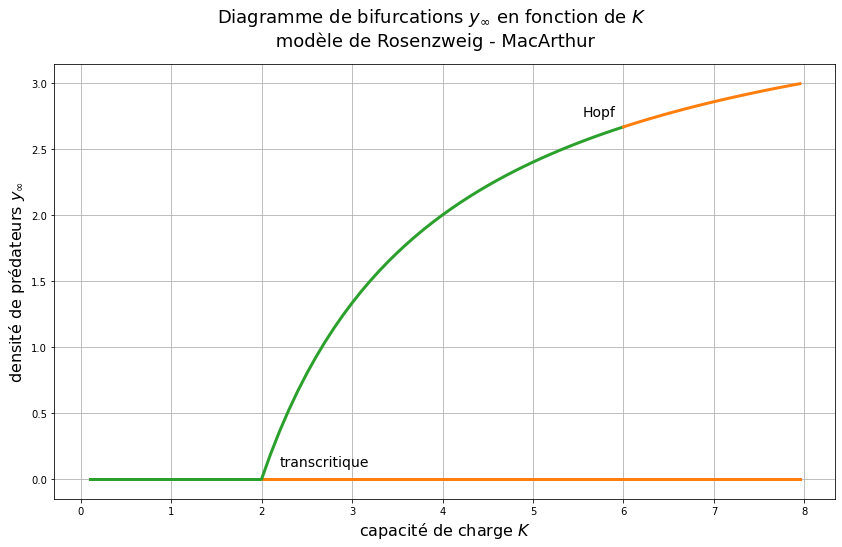

In [5]:
# création d'une figure, et d'un système d'axe
fig3, ax3 = plt.subplots(1, 1, figsize=(14, 8))  

# titre de la figure
fig3.suptitle("Diagramme de bifurcations $y_\infty$ en fonction de $K$\n modèle de Rosenzweig - MacArthur", va='top', fontsize='18')

####
# tracé des différentes branches d'équilibres, couleurs en fonction de la stabilité

# situation 1.
ax3.plot(Kplot1, y_prey1, color = 'C2', linewidth = 3, label = "asymptotiquement stable")

# situation 2.
ax3.plot(Kplot2, y_prey2, color = 'C1', linewidth = 3, label = "instable")
ax3.plot(Kplot2, y_coex2, color = 'C2', linewidth = 3)

# situation 3.
ax3.plot(Kplot3, y_prey3, color = 'C1', linewidth = 3)
ax3.plot(Kplot3, y_coex3, color = 'C1', linewidth = 3)


###
# labellisation des axes
ax3.set_ylabel('densité de prédateurs $y_\infty$', fontsize='16')
ax3.set_xlabel('capacité de charge $K$', fontsize='16')


# Type des bifurcations
ax3.text(2.2, 0.1, 'transcritique', fontsize='14')
ax3.text(5.55, 2.75, 'Hopf', fontsize='14')

# modification éventuelle des bornes des axes
#ax3.set_ylim(bottom=-.1, top=10)
#ax3.set_xlim(left=-.1, right=8)

# ajout d'une grille
ax3.grid()

On aimerait pouvoir visualiser sur le diagramme de bifurcations l'amplitude du cycle limite attractif qui émerge de l'équilibre instable. Pour cela, on utilise une approche qui consiste à simuler pendant longtemps le système dynamique et récupérer les extrema de la trajectoire périodique pour ensuite les tracer.

In [6]:
%%timeit

# temps d'intégration du transitoire "long"
tspan_transitoire = np.arange(t_0, 100*t_fin, pas_t)

# array pour sauvegarder les extrema de la trajectoire périodique
y_cycle_min = np.array([])
y_cycle_max = np.array([])

for K_p in Kplot3:
    # on assigne le paramètre K à la valeur K_p
    params_RMA_cycle = np.array([r, K_p, c, h, b, m])
    
    # on simule le système pendant le transitoire
    int_RMA_transitoire =  odeint(modele_RMA, etat0_RMA, tspan_transitoire, args=(params_RMA_cycle,), hmax=pas_t)
    
    # on resimule depuis la dernière valeur calculée dans la simulation du transitoire
    int_RMA_cycle = odeint(modele_RMA, int_RMA_transitoire[-1, :], tspan, args=(params_RMA_cycle,), hmax=pas_t)
    
    # on sauvegarde les extremas dans y_cycle_min et _max en appendant les array et les réassignant
    y_cycle_min = np.append(y_cycle_min, np.min(int_RMA_cycle[:,1]))
    y_cycle_max = np.append(y_cycle_max, np.max(int_RMA_cycle[:,1]))

1min 49s ± 2.34 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Il ne reste plus qu'à tracer ces deux branches dans la figure précédente :

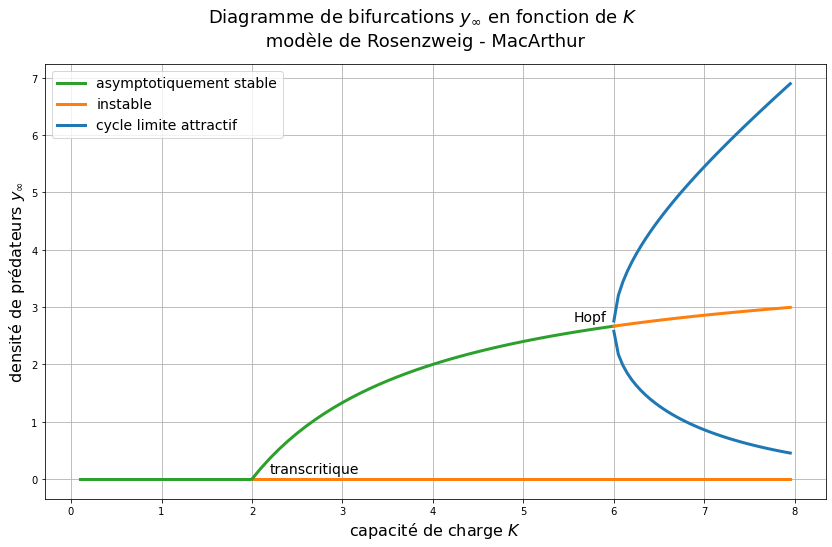

In [6]:
# situation 3.
# tracé des branches min et max de la trajectoire périodique
ax3.plot(Kplot3, y_cycle_min, color = 'C0', linewidth = 3, label = "cycle limite attractif")
ax3.plot(Kplot3, y_cycle_max, color = 'C0', linewidth = 3)

# légende
ax3.legend(fontsize='14')

# réafficher la figure
display(fig3)

C'est fini !